In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Ulum\Downloads\archive (5)\earthquake_data_tsunami.csv')
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [4]:
df['count'] = 1

In [5]:
efek=[]
for row in df['magnitude']:
    if row <2.5 :
        efek.append('tidak terasa')
    elif row <6.0 :
        efek.append('gempa kecil')
    elif row < 7.9 :
        efek.append('gempa besar')
    else :
        efek.append('gempa dahsyat')
df['Desc'] = efek
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,count,Desc
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,1,gempa besar
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,1,gempa besar
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,1,gempa besar
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,1,gempa besar
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,1,gempa besar


In [6]:
mag = pd.DataFrame(df['magnitude'].value_counts())
cdi = pd.DataFrame(df['cdi'].value_counts())
mmi = pd.DataFrame(df['mmi'].value_counts())

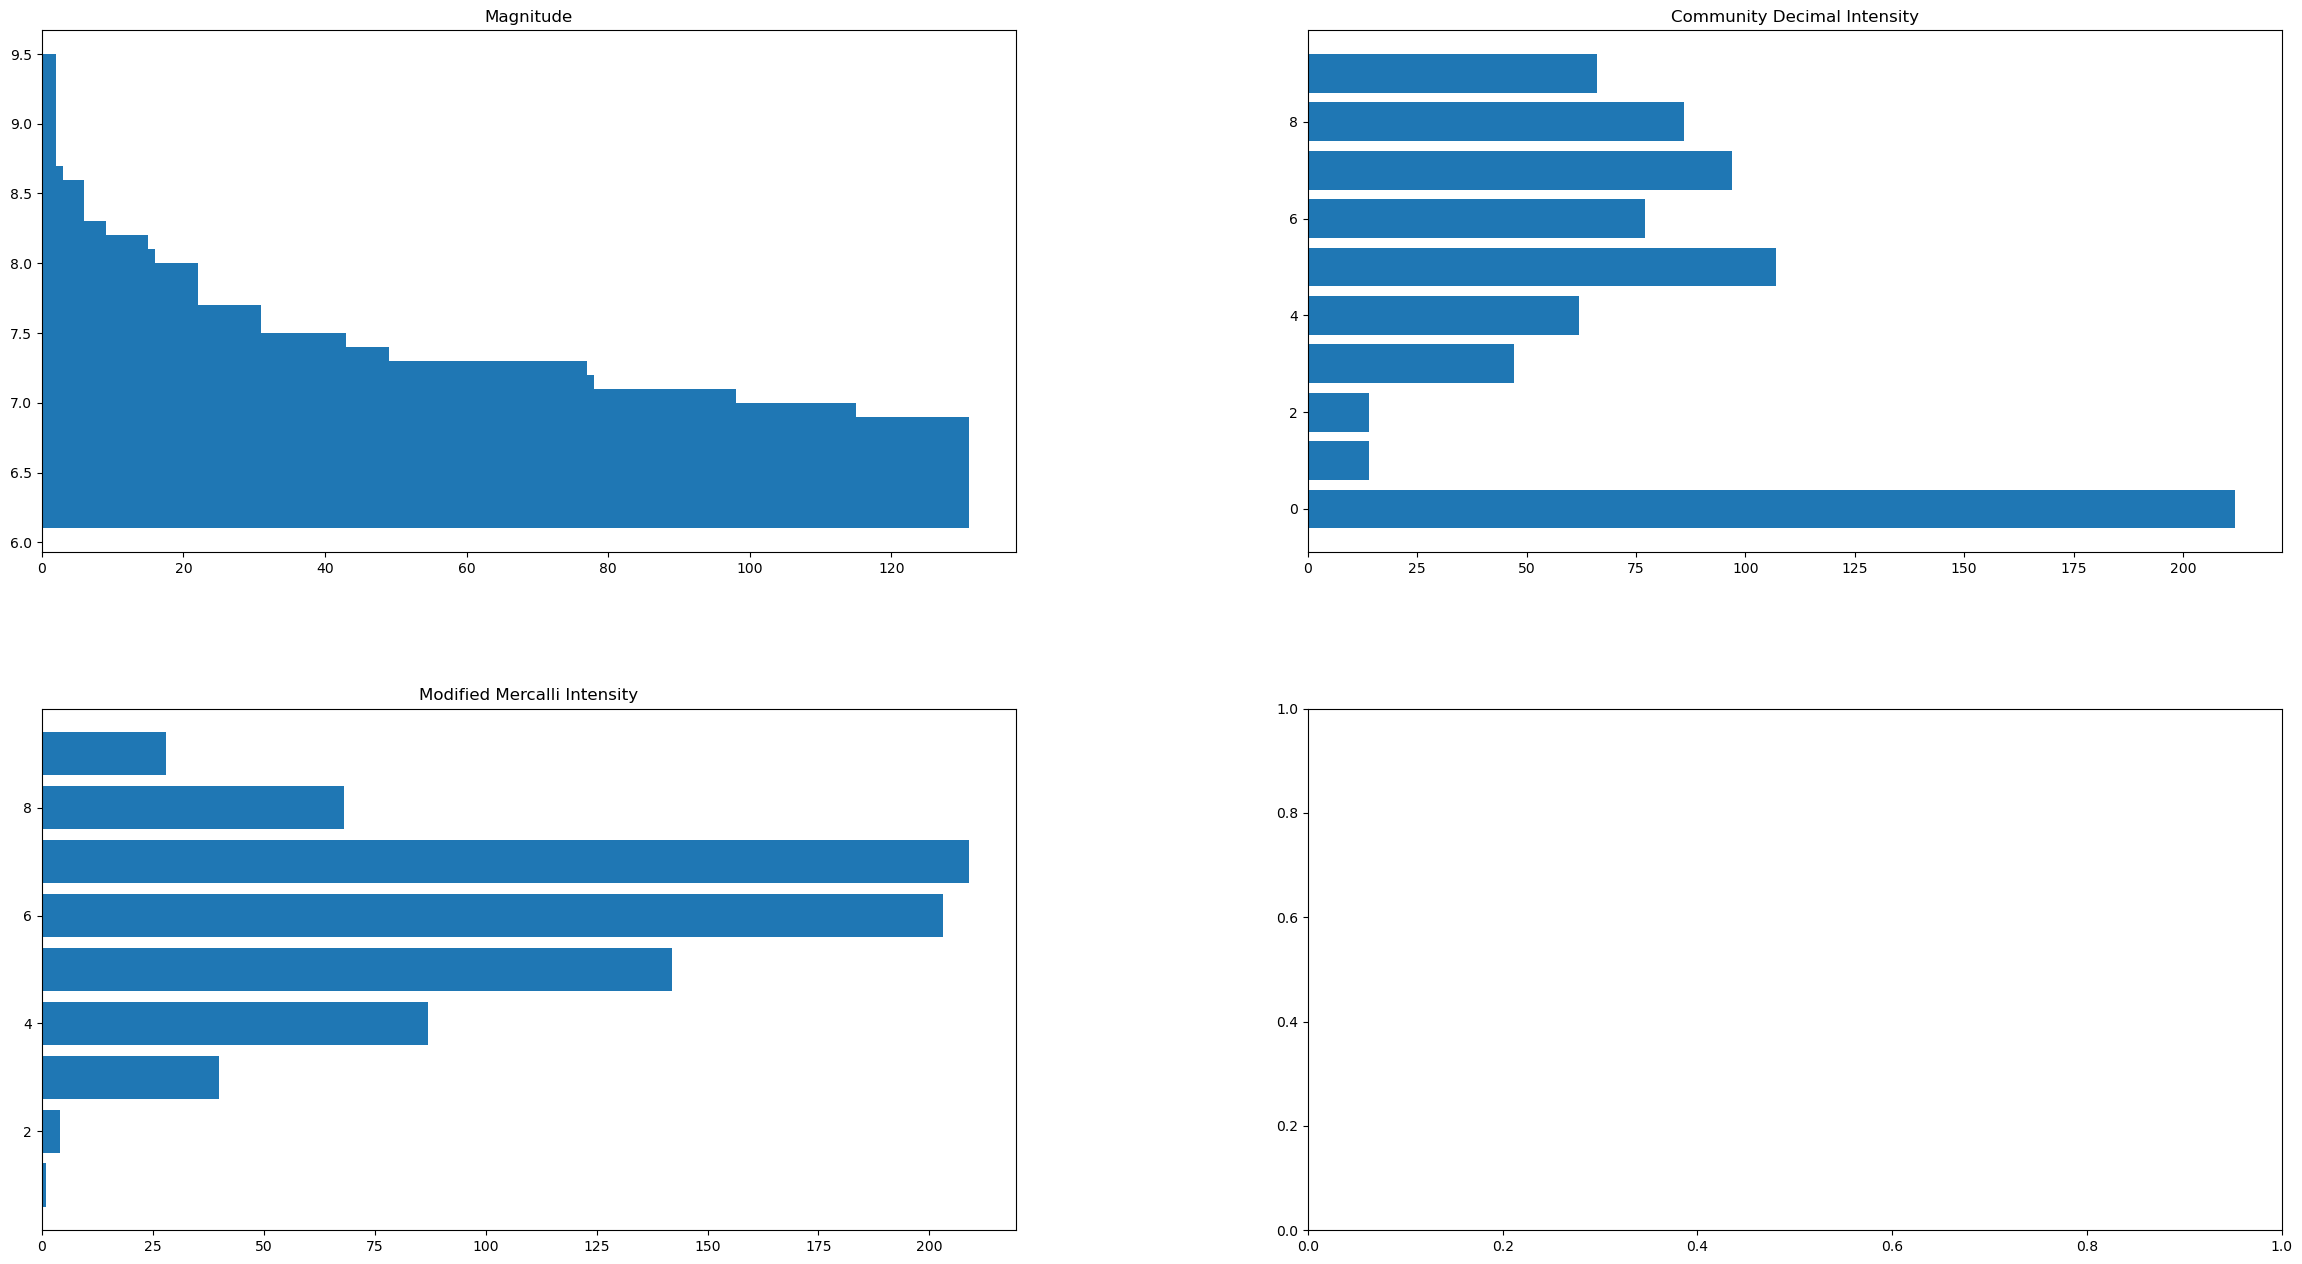

In [7]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].barh(mag.index, mag['count'])
axis[0, 0].set_title('Magnitude')
#axis[0, 1].tick_params(labelrotation=90)

axis[0, 1].barh(cdi.index, cdi['count'])
axis[0, 1].set_title('Community Decimal Intensity')
#axis[0, 2].tick_params(labelrotation=90)

axis[1, 0].barh(mmi.index, mmi['count'])
axis[1, 0].set_title('Modified Mercalli Intensity')
#axis[1, 0].tick_params(labelrotation=90)

plt.subplots_adjust(left=0, bottom=0.5,right=3.5,top=3,wspace=0.3,hspace=0.3)
plt.show()

In [8]:
depth=df.groupby(['depth']).sum().sort_values('count', ascending = False).reset_index()[['depth','count']].head(10)

<BarContainer object of 10 artists>

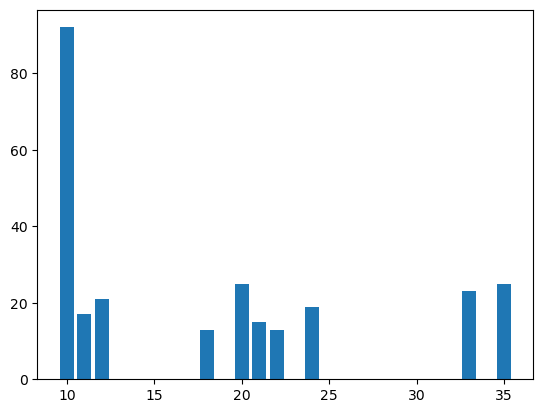

In [9]:
plt.bar(depth['depth'],depth['count'])

In [10]:
desc = df.groupby(['Desc']).sum().sort_values('count', ascending=False).reset_index()[['Desc','count']]
desc

,Desc,count
0,gempa besar,745
1,gempa dahsyat,37


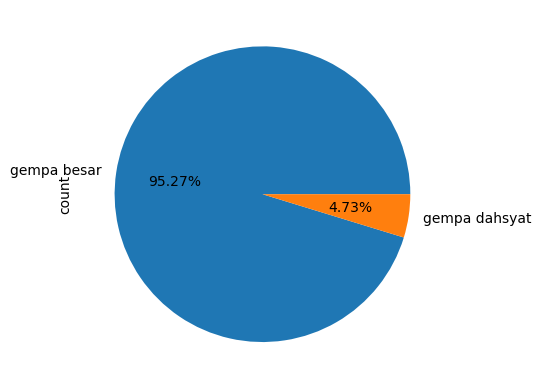

In [11]:
desc.plot(x = 'Desc', y = 'count', kind ='pie', labels = desc['Desc'], autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [12]:
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,count,Desc
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1,1,gempa besar
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0,1,gempa besar
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1,1,gempa besar
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1,1,gempa besar
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1,1,gempa besar


In [84]:
ynm = df.groupby(['Year','Month']).sum().sort_values(['Year', 'Month'], ascending=True).reset_index()[['Year','Month','count']]

In [85]:
ynm.head()

,Year,Month,count
0,2001,1,7
1,2001,2,4
2,2001,3,2
3,2001,4,1
4,2001,6,2


In [20]:
import calendar
ynm['Month'] = ynm['Month'].apply(lambda x: calendar.month_abbr[x])

In [28]:
ynm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      241 non-null    int64         
 1   Month     241 non-null    object        
 2   count     241 non-null    int64         
 3   Calendar  241 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.7+ KB


In [86]:
ynm['Calendar'] = ynm['Year'].astype(str) + ' ' + ynm['Month'].astype(str)

In [87]:
ynm['Calendar'] = pd.to_datetime(ynm['Calendar'])

C:\Users\Ulum\AppData\Local\Temp\ipykernel_4892\2376721813.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ynm['Calendar'] = pd.to_datetime(ynm['Calendar'])


In [88]:
ynm['YearMonth'] = ynm['Year'].astype(str) + ' ' + ynm['Month'].astype(str)

In [92]:
year1.head()

,Year,Month,count,YearMonth
0,2001,1,7,2001 1
1,2001,2,4,2001 2
2,2001,3,2,2001 3
3,2001,4,1,2001 4
4,2001,6,2,2001 6


In [90]:
year1 = ynm.drop(['Calendar'], axis=1)

In [91]:
year2 = year1.groupby(['Year']).sum().sort_values(['Year'], ascending=True).reset_index()[['Year','count']]
month = year1.groupby(['Month']).sum().sort_values(['Month'], ascending=True).reset_index()[['Month','count']]

Text(0, 0.5, 'Count of Earthquake')

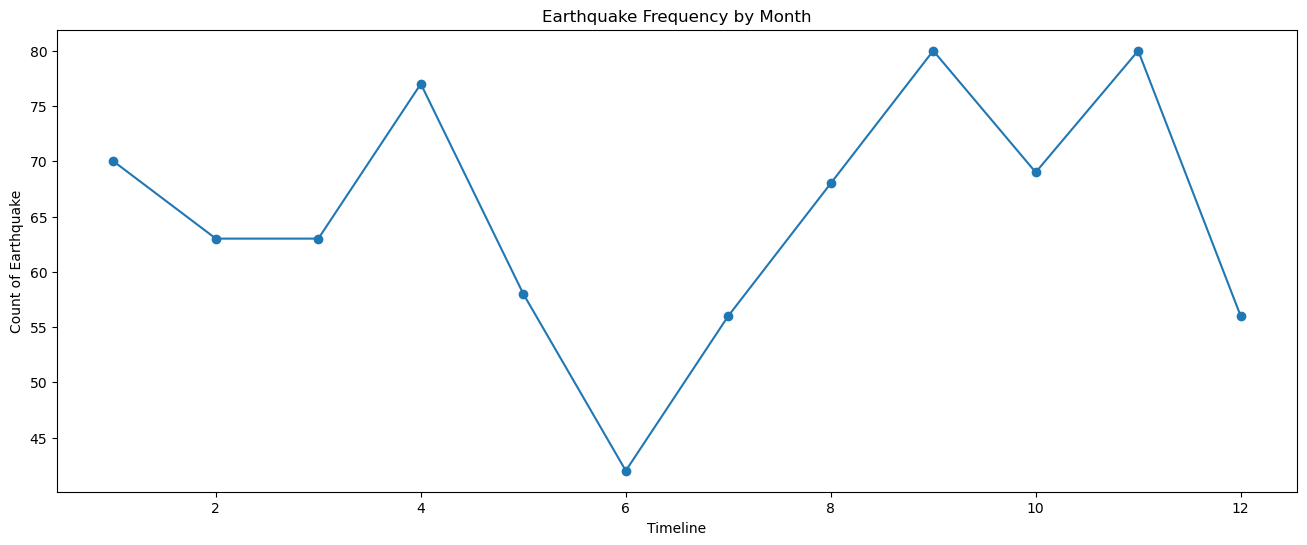

In [96]:
plt.figure(figsize=(16, 6))
plt.plot(month['Month'], month['count'], marker='o', linestyle='-')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Timeline')
plt.ylabel('Count of Earthquake')

Text(0, 0.5, 'Count of Earthquake')

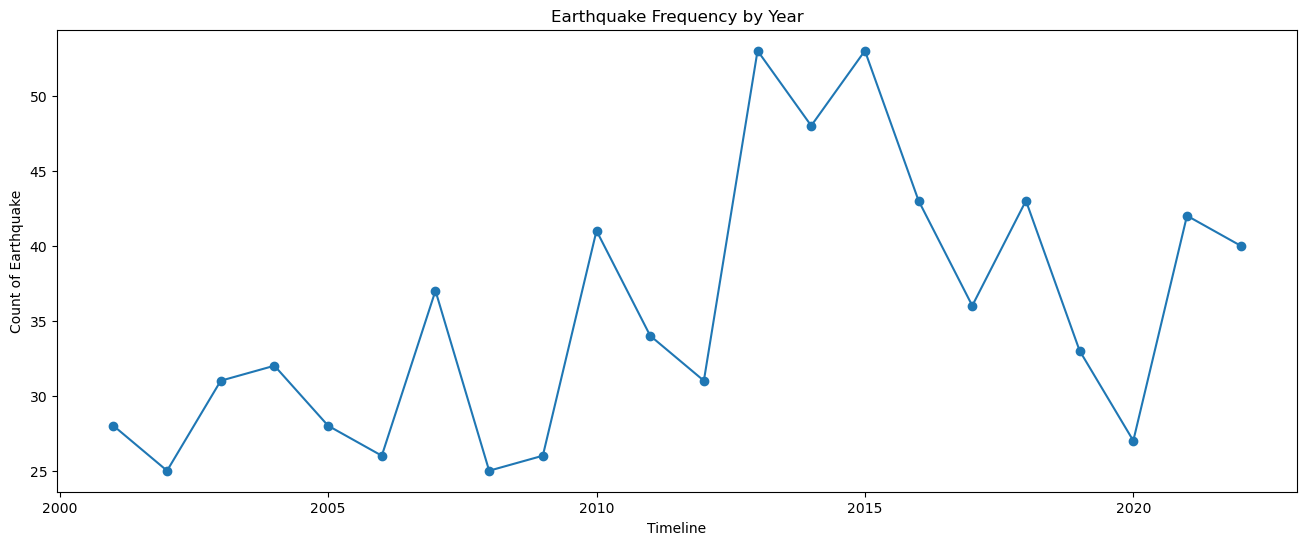

In [80]:
plt.figure(figsize=(16, 6))
plt.plot(year2['Year'], year2['count'], marker='o', linestyle='-')
plt.title('Earthquake Frequency by Year')
plt.xlabel('Timeline')
plt.ylabel('Count of Earthquake')

Text(0, 0.5, 'Count of Earthquake')

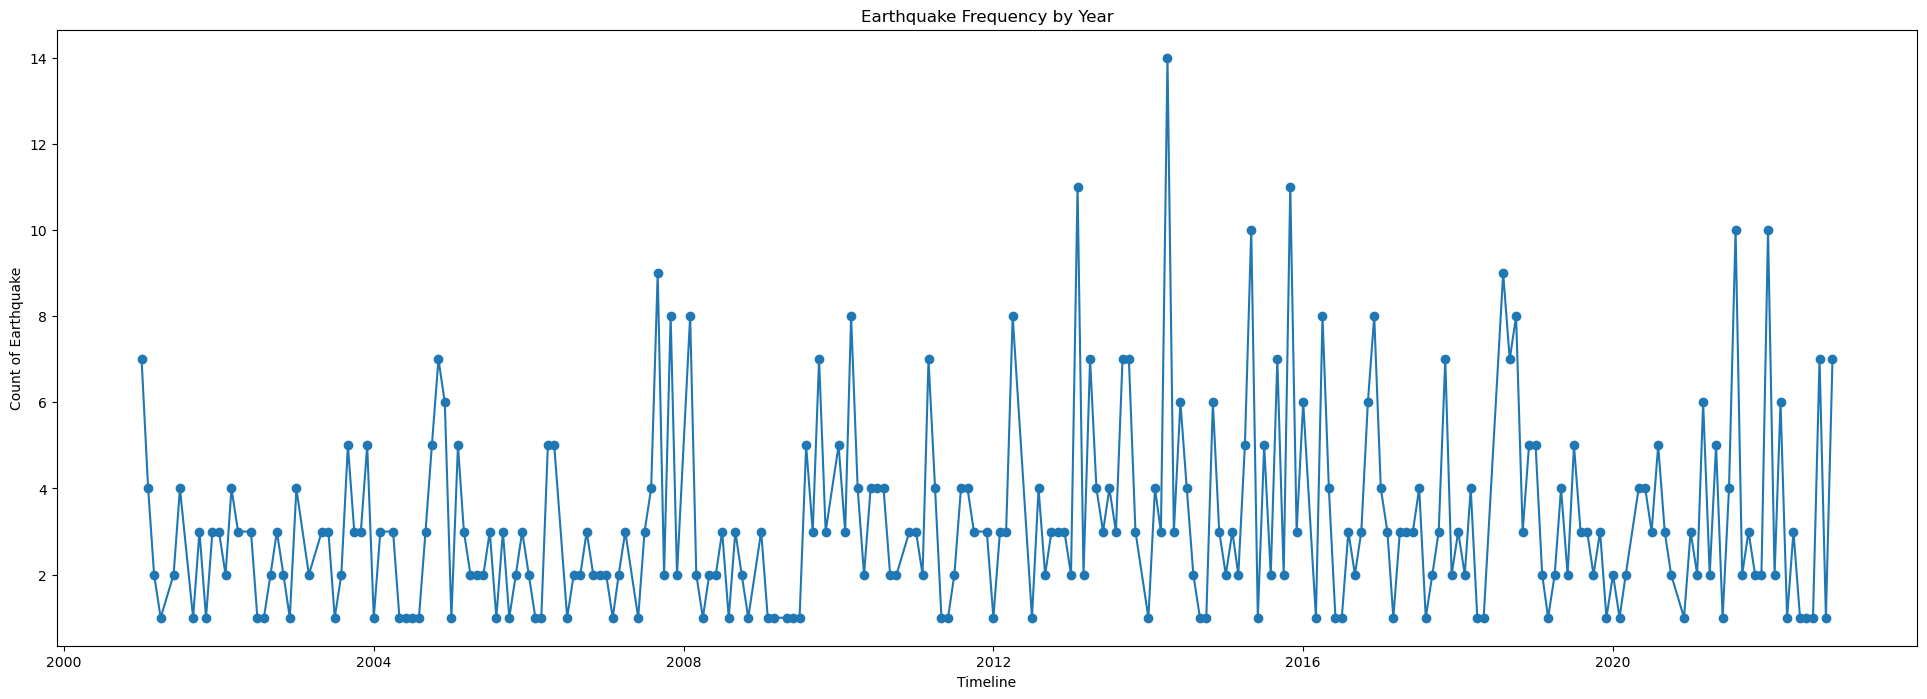

In [58]:
plt.figure(figsize=(24, 8))
plt.plot(ynm['Calendar'], ynm['count'], marker='o', linestyle='-')
plt.title('Earthquake Frequency by Year')
plt.xlabel('Timeline')
plt.ylabel('Count of Earthquake')